# Question 2: How do apartment prices vary between states and cities?

In [278]:
import matplotlib.pyplot as plt
import pandas as pd

data_filepath = "data/data.csv"

In [279]:
data = pd.read_csv(data_filepath)

data.head()

,Unnamed: 0,id,bathrooms,bedrooms,fee,price,square_feet,cityname,state,latitude,longitude,date,price_per_square_ft
0,0,5668640009,1.0,1.0,No,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,2019-12-26,4.049815
1,1,5668639818,1.5,3.0,No,1250.0,1500,Newport News,VA,37.0867,-76.4941,2019-12-26,0.833333
2,2,5668639686,2.0,3.0,No,1395.0,1650,Raleigh,NC,35.8230,-78.6438,2019-12-26,0.845455
3,3,5668639659,1.0,2.0,No,1600.0,820,Vacaville,CA,38.3622,-121.9712,2019-12-26,1.951220
4,4,5668639374,1.0,1.0,No,975.0,624,Albuquerque,NM,35.1038,-106.6110,2019-12-26,1.562500


In [280]:
data_subset = data[["state", "cityname", "price"]]

data_subset.head()

,state,cityname,price
0,CA,Redondo Beach,2195.0
1,VA,Newport News,1250.0
2,NC,Raleigh,1395.0
3,CA,Vacaville,1600.0
4,NM,Albuquerque,975.0


# Average Monthly Price by State

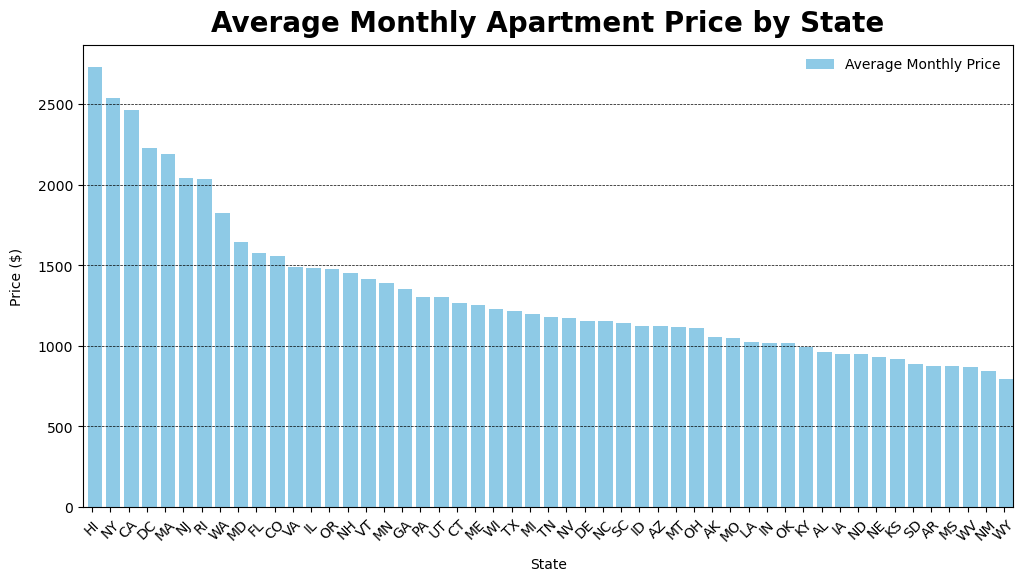

In [281]:
# data
price_average_per_state = data_subset.groupby("state")["price"].mean().reset_index().sort_values(by="price", ascending=False)

# figure
figure = price_average_per_state.plot.bar(x="state", y="price", color="#8ECAE6", figsize=(12,6))

# formatting
figure.set_title("Average Monthly Apartment Price by State", fontsize=20, fontweight="bold", pad=10)
figure.legend(["Average Monthly Price"], loc="upper right", frameon=False)
figure.set_xlabel("State", labelpad=10)
figure.set_ylabel("Price ($)", labelpad=10)

plt.grid(linestyle="--", color="#000000", linewidth=0.5, axis="y")
plt.xticks(rotation=45)
for bar in figure.patches:
    bar.set_width(0.8)

# show
plt.show()

Hawaii has the highest average prices while Wyoming has the lowest average prices.

# Comparing city prices

In [282]:
data_subset_filtered = data_subset[data_subset["price"] < 10000] # removes outliers
price_average_per_city = data_subset_filtered.groupby("cityname")["price"].mean().reset_index()

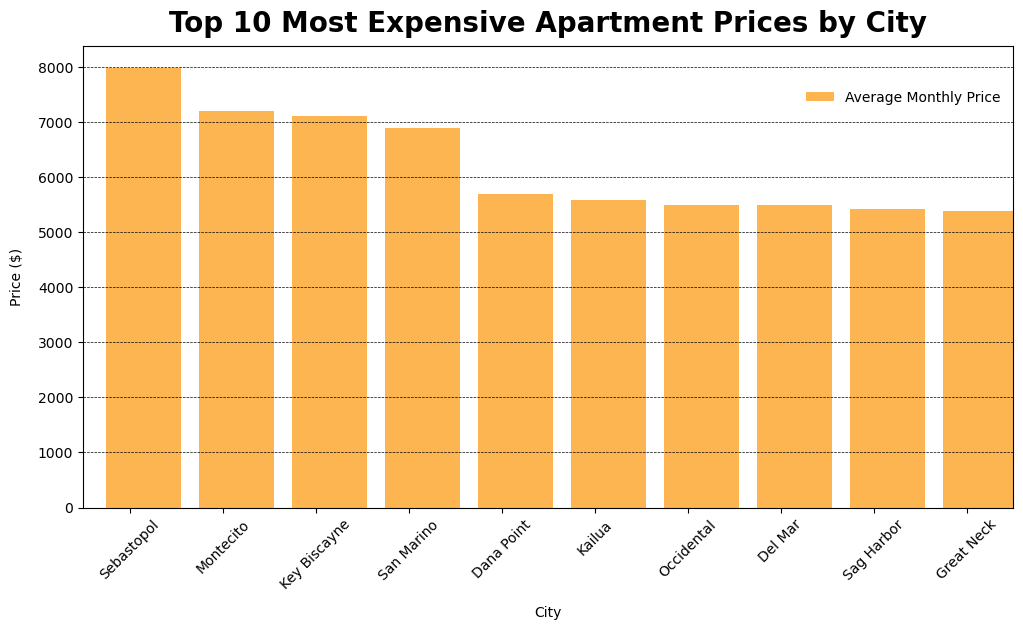

In [283]:
# data
most_expensive_cities = price_average_per_city.sort_values(by="price", ascending=False).head(10)

# figure
figure = most_expensive_cities.plot.bar(x="cityname", y="price", color="#fcb551", figsize=(12,6))

# formatting
figure.set_title("Top 10 Most Expensive Apartment Prices by City", fontsize=20, fontweight="bold", pad=10)
figure.legend(["Average Monthly Price"], loc="upper right", bbox_to_anchor=(1, 0.93), frameon=False)
figure.set_xlabel("City", labelpad=10)
figure.set_ylabel("Price ($)", labelpad=10)

plt.grid(linestyle="--", color="#000000", linewidth=0.5, axis="y")
plt.xticks(rotation=45)
for bar in figure.patches:
    bar.set_width(0.8)

# show
plt.show()

The highest average prices can be found in Sebastopol, Montecito, and Key Biscayne.

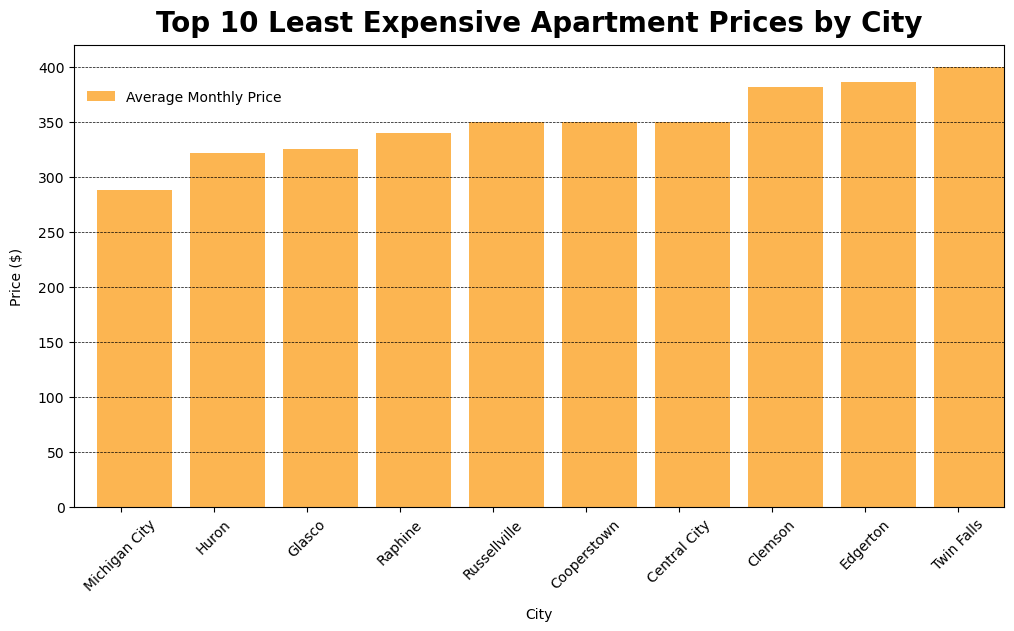

In [284]:
# data
least_expensive_cities = price_average_per_city.sort_values(by="price").head(10)

# figure
figure = least_expensive_cities.plot.bar(x="cityname", y="price", color="#fcb551", figsize=(12,6))

# formatting
figure.set_title("Top 10 Least Expensive Apartment Prices by City", fontsize=20, fontweight="bold", pad=10)
figure.legend(["Average Monthly Price"], loc="upper left", bbox_to_anchor=(0, 0.93), frameon=False)
figure.set_xlabel("City", labelpad=10)
figure.set_ylabel("Price ($)", labelpad=10)

plt.grid(linestyle="--", color="#000000", linewidth=0.5, axis="y")
plt.xticks(rotation=45)
for bar in figure.patches:
    bar.set_width(0.8)

# show
plt.show()

The lowest average prices can be found in Michigan City, Huron, and Glasco.